<a href="https://colab.research.google.com/github/geedoubledee/data620_week3assignment/blob/main/DATA620_Week3_Assignment_GDavis_BDavidoff_PGatica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA620: Week 3 Assignment
#### by Glen Davis, Brett Davidoff, and Peter Gatica

In [38]:
import io
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import random
import requests
import scipy as sp

## Introduction

We load node and edge data from https://networkrepository.com/fb-pages-tvshow.php for mutually liked verified Facebook pages related to certain TV shows, originally collected in November 2017. Nodes represent TV show pages, and edges represent mutual likes among them.

In [39]:
random.seed(1006)
fn_edges = "https://raw.githubusercontent.com/geedoubledee/data620_week3assignment/main/fb-pages-tvshow.edges"
resp = requests.get(fn_edges)
G = nx.read_edgelist(io.BytesIO(resp.content), delimiter=",", nodetype=int)
fn_nodes = "https://raw.githubusercontent.com/geedoubledee/data620_week3assignment/main/fb-pages-tvshow.nodes"
nodes_df = pd.read_csv(fn_nodes)
subset = ["name", "new_id"]
nodes_df = nodes_df[subset]
print(G)

Graph with 3892 nodes and 17262 edges


## Analysis

Graph G has 3,892 nodes and 17,262 edges. We eliminate TV show pages with non-ASCII characters in their names, then take a small subset of the remaining pages for visualization. From this subset, we also eliminate any pages that are in isolation, i.e. those not connected to other pages by any mutual likes.

In [40]:
def check_chars(s):
    return s.isascii()
nodes_df["chars_okay"] = nodes_df.loc[:, "name"].apply(check_chars)
nodes_df = nodes_df[nodes_df["chars_okay"] == True]
nodes_df.sort_values(by="new_id", inplace=True)
nodes_dict = dict(zip(nodes_df.new_id, nodes_df.name))
subset = random.sample(list(nodes_df["new_id"]), 100)
H = G.subgraph(subset)
I = H.copy()
I.remove_nodes_from(list(nx.isolates(H)))
I = nx.relabel_nodes(I, nodes_dict)

Below is a visualization of the subset of connected TV pages we've selected. We will refer to this graph as subgraph I.

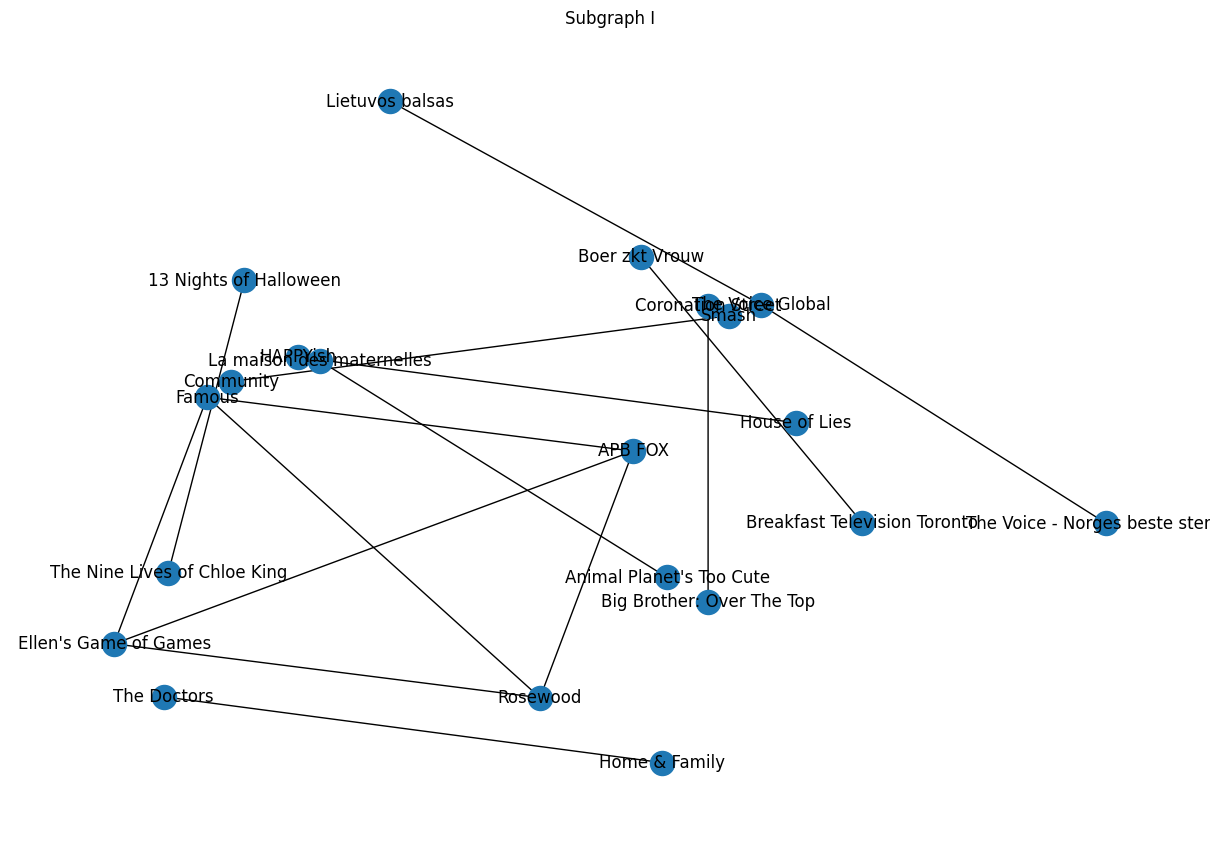

In [41]:
plt.figure(figsize=(12,8))
nx.draw_kamada_kawai(I, with_labels=True)
plt.title("Subgraph I")
plt.show()

The diameter of a graph is the length of the shortest path between its most distanced nodes. We can't calculate the diameter of subgraph I pictured above because it is not connected. However, we can calculate the diameter of the original connected graph G:

In [42]:
print(nx.diameter(G))

20


The diameter of the original connected graph G is 20. We can also calculate its density, or the ratio of its number of edges to its maximum possible edges:

In [43]:
print(nx.density(G))

0.0022797490611982272


With a density of 0.002, graph G is relatively sparse. Next, we calculate the degree centrality for each of the nodes in graph G. For a given node, the degree centrality is the fraction of nodes it is connected to. In the interest of space, we only print degree centrality measures for fifty of the nodes.

In [44]:
#degree centrality
dc = nx.degree_centrality(G)

for k, v in list(dc.items())[:50]:
    print(f"{str(k).ljust(4)} ---- {v}")

0    ---- 0.0010280133641737343
1838 ---- 0.0007710100231303008
1744 ---- 0.0012850167052171678
14   ---- 0.0010280133641737343
2543 ---- 0.0015420200462606015
1    ---- 0.0038550501156515036
1009 ---- 0.003084040092521203
1171 ---- 0.005140066820868671
1465 ---- 0.004883063479825238
2069 ---- 0.0033410434335646366
2080 ---- 0.004626060138781804
1856 ---- 0.0033410434335646366
3799 ---- 0.004112053456694937
1033 ---- 0.004883063479825238
2717 ---- 0.0033410434335646366
300  ---- 0.004112053456694937
1603 ---- 0.0033410434335646366
942  ---- 0.003084040092521203
3678 ---- 0.0025700334104343356
952  ---- 0.00359804677460807
815  ---- 0.004112053456694937
2    ---- 0.0010280133641737343
3656 ---- 0.00359804677460807
3459 ---- 0.002827036751477769
1157 ---- 0.003084040092521203
1993 ---- 0.002827036751477769
3    ---- 0.016705217167823184
386  ---- 0.02081727062451812
2659 ---- 0.024929324081213056
2160 ---- 0.01644821382677975
1925 ---- 0.014906193780519147
3511 ---- 0.016705217167823184


Now we can find the node with the highest degree centrality in graph G:

In [45]:
# Highest degree centrality
print(max(dc, key=dc.get), dc[max(dc, key=dc.get)])
row = nodes_df[nodes_df["new_id"] == max(dc, key=dc.get)]
print(str(row.iloc[0, 0]))

2008 0.03238242097147263
Home & Family


Node 2008, representing the Facebook page for the TV show Home & Family, has the highest degree centrality, meaning it is the most mutually liked TV show page in this Facebook dataset. Now we can find the node with the lowest degree centrality in graph G:

In [46]:
# Lowest degree centrality
print(min(dc, key=dc.get), dc[min(dc, key=dc.get)])
row = nodes_df[nodes_df["new_id"] == min(dc, key=dc.get)]
print(str(row.iloc[0, 0]))

17 0.00025700334104343357
TVR


Node 17, representing the Facebook page for the TV show TVR, has the lowest degree centrality, meaning it is the least mutually liked TV show page in this Facebook dataset. Finally, we plot the distribution of degree centrality measures using a histogram.

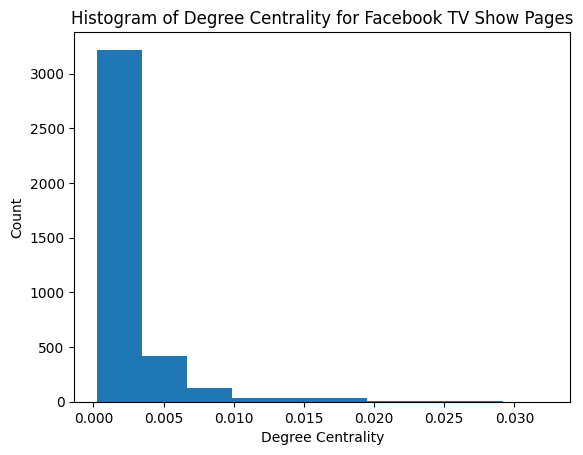

In [47]:
plt.hist(dc.values())
plt.title("Histogram of Degree Centrality for Facebook TV Show Pages")
plt.xlabel("Degree Centrality")
plt.ylabel("Count")
plt.show()

## Conclusion

This histogram shows that most of the Facebook TV show pages have low degree centrality measures, meaning that most of these nodes aren't connected to that many other nodes. The number of edges, i.e. mutual likes, is relatively low for most TV show pages. So there are not too many TV show pages with a high mutual like count in this Facebook dataset.

## Video Presentation

[Here is a link](https://www.loom.com/share/8dc980f039e843908dec55ce1d3a4cd5?sid=32afe4db-a230-4cb6-94a9-239ddfcf2db1) to a short video presentation of this assignment.